# Denis Gauthier

## Research question/interests
Has the cultural shift towards the importance of school affected increased the Dogwood Diploma completion rate inside British Columbia's schools?

With the cultural mindset shifting towards post-secondary education as necessary, has this been reflected in dogwood completion rates inside British Columbia? As well as has the betterment of cultural mindset towards disabilities and the support given to students that are classified as having disabilities increased the overall completion rate for those affected


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 1 - Load the data
data = pd.read_csv("../data/raw/Completion_Rate_residents_only_97-21.csv")
data

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185,35.196,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165,31.884,100
55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41,6.97,100


# Milestone 3 
## Task 1 - EDA

In [3]:
#Function for stripping if needed/cleaning
def dataStripping (dataFrame, column = [], value=[], boolean=True):
    """
    Removes the directed item & returns the newly cleaned df
    Input:
        - dataFrame = the pandas dataframe you need cleaned
        - column = The pandas df column key or many
        - value = The value you want removed or many
        - boolean = True = you want this item only, False = remove it 
    Output: 
        - The newly cleaned pandas Dataframe
    """
    try:
        for i,j in zip(column,value): 
            dataFrame = dataFrame[dataFrame['{}'.format(i)].str.contains('{}'.format(j)) == boolean]

        return dataFrame
    except:
        print("Error! Something is wrong in dataStripping")

In [4]:
data.shape

(55596, 13)

In [5]:
data.head()

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244


In [6]:
data.nunique()

YEAR_6_OF_COHORT                24
DATA_LEVEL                       2
SUB_POPULATION                   5
PUBLIC_OR_INDEPENDENT            3
DISTRICT_NUMBER                 60
DISTRICT_NAME                   60
FACILITY_TYPE                    1
COMPLETION_RATE_MODEL            8
MODEL_TYPE                       2
COHORT_COUNT                  4908
SUCCESS_COUNT                 4928
ESTIMATED_OUTMIGRANTS        34589
ESTIMATED_COMPLETION_RATE    27168
dtype: int64

In [7]:
data['FACILITY_TYPE'].unique()

array(['ALL FACILITY TYPES'], dtype=object)

Facility type is not helpful, only contains the 1 value. Can safely be dropped.

In [8]:
data['MODEL_TYPE'].unique()

array(['DYNAMIC MODEL', 'STATIC MODEL'], dtype=object)

In [9]:
data['SUB_POPULATION']

0             ALL STUDENTS
1               INDIGENOUS
2           NON INDIGENOUS
3            SPECIAL NEEDS
4        NON SPECIAL NEEDS
               ...        
55591         ALL STUDENTS
55592           INDIGENOUS
55593       NON INDIGENOUS
55594        SPECIAL NEEDS
55595    NON SPECIAL NEEDS
Name: SUB_POPULATION, Length: 55596, dtype: object

Should most likely change the row "Special Needs" to be more up to date and political correct


In [10]:
data['ESTIMATED_COMPLETION_RATE']

0        75.352
1        39.224
2        78.176
3        26.127
4        76.244
          ...  
55591       100
55592    96.677
55593       100
55594       100
55595       100
Name: ESTIMATED_COMPLETION_RATE, Length: 55596, dtype: object

In [11]:
estComp = list(data['ESTIMATED_COMPLETION_RATE'])
for i in range(len(estComp)):
    if i < 12:
        print(estComp[i])



75.352
39.224
78.176
26.127
76.244
74.544
39.295
77.405
Msk
Msk
88.804
36.308


I have msk (masked) values in here that will need to be dropped in my cleaning section

# IMPORTANT NOTE:

During the process of search & trying to make graphs we realized that our data was type(String) making it nearly impossible to graph a majority of our data. To fix this we did a cleaning step of removing Msk (masked) data. Then we saved the data using pandas to_csv() function which we believe changes our Strings to Int allowing us to use the data. So, from this point on the data used will be from our processed folder. data_clean will be used for the rest of this section until Task 2. We will then go through the steps of cleaning the data and use the original data file.


In [12]:
# Step 2 Removes all the Msk from the dataset - Drops roughly 4770 rows of data 
#cleanData = data[data[ 'SUCCESS_COUNT' ].str.contains( 'Msk' )==False ]

#This is saving the cleaned data as a csv file in the processed file so future analysis can be just done from the new file 
#cleanData.to_csv('../data/processed/Completion_Rates_Clean.csv')


In [13]:
data_clean = pd.read_csv("../data/processed/Completion_Rates_Clean.csv")

data_clean.head()

,Unnamed: 0,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244


In [14]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,49826.0,28504.073114,15712.868849,0.000,15026.25000,28584.500,42065.7500,55595.00
DISTRICT_NUMBER,47217.0,52.186776,22.248752,5.000,37.00000,52.000,70.0000,93.00
COHORT_COUNT,49826.0,1634.445872,6683.023683,10.000,102.00000,265.000,699.0000,58338.00
SUCCESS_COUNT,49826.0,1367.751315,5673.585654,10.000,69.00000,209.000,579.0000,51252.00
ESTIMATED_OUTMIGRANTS,49826.0,130.794084,813.914165,0.000,6.05200,16.724,51.8035,63765.32
ESTIMATED_COMPLETION_RATE,49826.0,81.635597,41.306278,-3690.646,74.93625,89.397,98.4200,100.00


<AxesSubplot: >

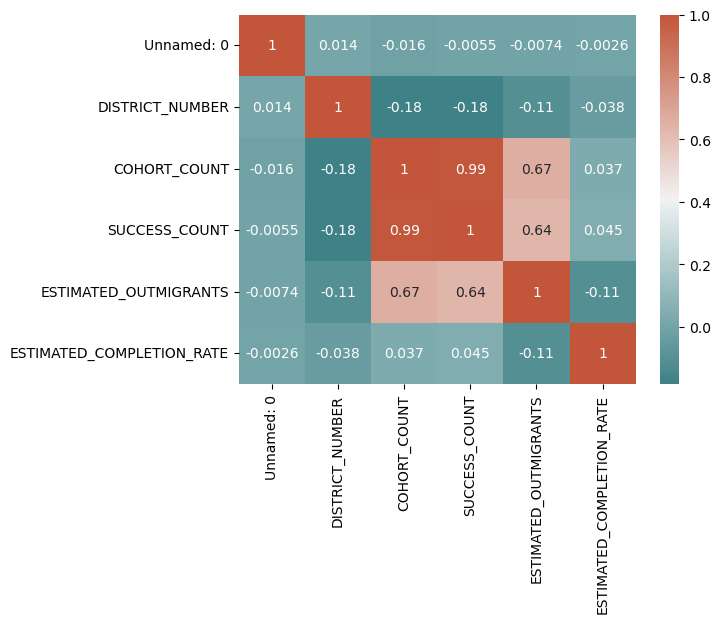

In [15]:
correlation = data_clean.corr()

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels = correlation.columns, annot = True, cmap=sns.diverging_palette(200,20, as_cmap=True))

"Unnamed" column provides no useful data & can be dropped, As well as ESTIMATED_COMPLETION_RATE has inaccurate data that will need to be fixed. It is a percentage with a min of -3690.646%.

This heatmap shows off some interesting data, while it makes sense Success_count & Cohort_count are closely related. It is interesting that completion rates do not vary between district number. This means its an estimate for the whole province and not by district. 


In [16]:
#This removes the incorrect data
data_clean = data_clean[data_clean['ESTIMATED_COMPLETION_RATE']>=0]

#This corrects the data to just the beginning of the school year and not the end - Nicer for graphing
data_clean['YEAR_6_OF_COHORT'] = data_clean['YEAR_6_OF_COHORT'].str.slice(0,-5)


<AxesSubplot: xlabel='SUB_POPULATION', ylabel='ESTIMATED_COMPLETION_RATE'>

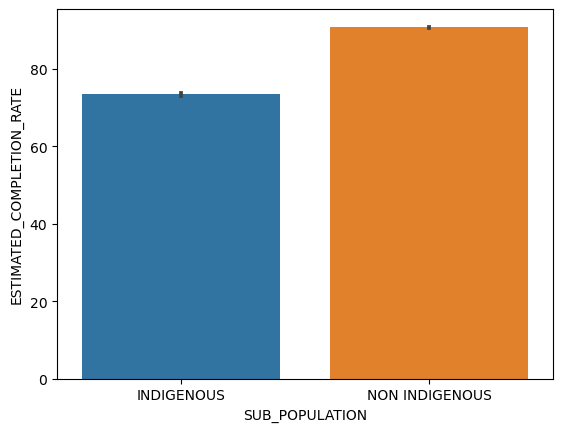

In [17]:
indig = data_clean[data_clean['SUB_POPULATION'].str.contains("INDIGENOUS") == True]
sns.barplot(data=indig,x='SUB_POPULATION',y='ESTIMATED_COMPLETION_RATE')


# Figure 2
This shows the difference in estimated completion rates between indigenous students & non-Indigenous Students. This shows that Non Indigenous students have a higher estimated completion rate on average. However, something seems wrong and needs a more indepth analysis to discover. 

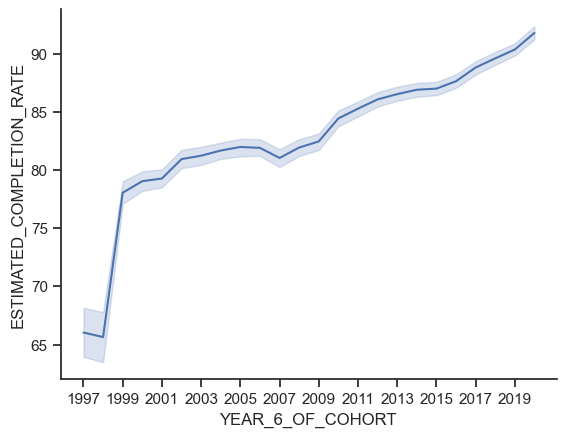

In [18]:
sns.set_theme(style='ticks', font_scale =1)
plt.rc("axes.spines", top=False, right=False)
ax = sns.lineplot(x='YEAR_6_OF_COHORT', y ='ESTIMATED_COMPLETION_RATE', data=data_clean)
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()


# Figure 3
Fig.3 shows that over the years, the estimated completion rate is actually increasing by year. If this is the case, then the real completion rate should also be increasing. This would make sense because if the actual rate was staying the same or decreasing, estimations would not be increasing every year. Should be noted that the first 2-3 years seem to have weird or missing data. This is why there is a sudden spike in the graph

In [19]:
indig = dataStripping(data,['SUB_POPULATION','COMPLETION_RATE_MODEL'],['INDIGENOUS', 'SIX YEAR DOGWOOD COMPLETION RATE'],True)
indig 


,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
1241,1999/2000,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,4071,1392,486.117,38.83
1242,1999/2000,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,50010,35318,5181.672,78.785
1246,1999/2000,PROVINCE LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,NaN,NaN,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,3964,1354,473.955,38.796
1247,1999/2000,PROVINCE LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,NaN,NaN,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,46986,32747,4887.275,77.786
1251,1999/2000,PROVINCE LEVEL,INDIGENOUS,BC INDEPENDENT SCHOOL,NaN,NaN,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,107,38,12.162,40.068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54013,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,91.0,Nechako Lakes,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,139,75,10.613,58.417
54014,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,91.0,Nechako Lakes,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,266,192,22.165,78.742
54018,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,92.0,Nisga'a,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,30,18,1.074,62.228
54022,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,SIX YEAR DOGWOOD COMPLETION RATE,STATIC MODEL,24,20,2.842,94.528



# Task 2 - Analysis Pipleline
In this section we will create/modify our dataframe to remove and clean up the data. 


In [20]:
data_raw = pd.read_csv("../data/raw/Completion_Rate_residents_only_97-21.csv")
#Removes any Msk data - should overlap & remove all msk in the table
cleanData = data_raw.copy().drop(['FACILITY_TYPE','MODEL_TYPE'],axis=1)
cleanData.reset_index()
cleanData = cleanData[cleanData[ 'SUCCESS_COUNT' ].str.contains( 'Msk' )==False ]
cleanData['SUB_POPULATION'] = cleanData['SUB_POPULATION'].str.replace('SPECIAL NEEDS','STUDENTS WITH DISABILITIES')
cleanData['SUB_POPULATION'] = cleanData['SUB_POPULATION'].str.replace('NON STUDENTS WITH DISABILITIES','STUDENTS WITHOUT DISABILITIES')
# fix NON STUDENTS WITH DISABILITES
cleanData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,COMPLETION_RATE_MODEL,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,STUDENTS WITH DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,STUDENTS WITHOUT DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,217,185,35.196,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,24,20,3.312,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,193,165,31.884,100
55594,2020/2021,DISTRICT LEVEL,STUDENTS WITH DISABILITIES,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,45,41,6.97,100


In [21]:
cleanData.rename(columns={'YEAR_6_OF_COHORT':'YEAR'})
cleanData

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,COMPLETION_RATE_MODEL,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,STUDENTS WITH DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,STUDENTS WITHOUT DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,217,185,35.196,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,24,20,3.312,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,193,165,31.884,100
55594,2020/2021,DISTRICT LEVEL,STUDENTS WITH DISABILITIES,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,45,41,6.97,100


# Task 3: Method Chaining
Basically doing all of task 2 with a function from another py file

In [23]:
import project_functions1 as func

In [24]:
clean_data = func.load_and_process("../data/raw/Completion_Rate_residents_only_97-21.csv")
clean_data

,YEAR,DATA_LEVEL,Type of Student,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,COMPLETION_RATE_MODEL,SUCCESS_COUNT,ESTIMATED_COMPLETION_RATE
0,1997,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,34014,75.352
1,1997,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,1284,39.224
2,1997,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,32730,78.176
3,1997,PROVINCE LEVEL,STUDENTS WITH DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,210,26.127
4,1997,PROVINCE LEVEL,STUDENTS WITHOUT DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,33804,76.244
...,...,...,...,...,...,...,...,...,...
55591,2020,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,185,100.000
55592,2020,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,20,96.677
55593,2020,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,165,100.000
55594,2020,DISTRICT LEVEL,STUDENTS WITH DISABILITIES,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,41,100.000


There we go! Data is now cleaner & has only the information that may be helpful to me!

# Task 4
## Denis' Research Question Reiteration:
My main research question is if dogwood completion rates have increase over the year, with this newer mentality of "Post-Secondary School is extremely important & needed to succeed" that has been placed on the younger generation. In the past, high paying jobs or even livable careers did not require a Post-Secondary Degree, however this has shifted to degrees are nearly required for most jobs. 

My secondary question is to see if Indigenous graduation rates have increased,decreased or remained fairly level for the past ~20 years. As well as Students with Disabilities.
### Time for Analysis

In [58]:
clean_data.head()

,YEAR,DATA_LEVEL,Type of Student,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,COMPLETION_RATE_MODEL,SUCCESS_COUNT,ESTIMATED_COMPLETION_RATE
0,1997,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,34014,75.352
1,1997,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,1284,39.224
2,1997,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,32730,78.176
3,1997,PROVINCE LEVEL,STUDENTS WITH DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,210,26.127
4,1997,PROVINCE LEVEL,STUDENTS WITHOUT DISABILITIES,PROVINCE-TOTAL,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,33804,76.244


In [25]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DISTRICT_NUMBER,46944.0,52.185668,22.247977,5.000,37.000,52.000,70.00000,93.0
ESTIMATED_COMPLETION_RATE,49538.0,83.986285,17.287480,5.957,75.299,89.519,98.44975,100.0


While the District_Number describe does not give any info, the Estimated completion rate does. It shows a wide range of values. I believe that the min & max numbers is just incorrect data, however the rest of the data is interesting. The there is an average rate of 83% throughout the years. 

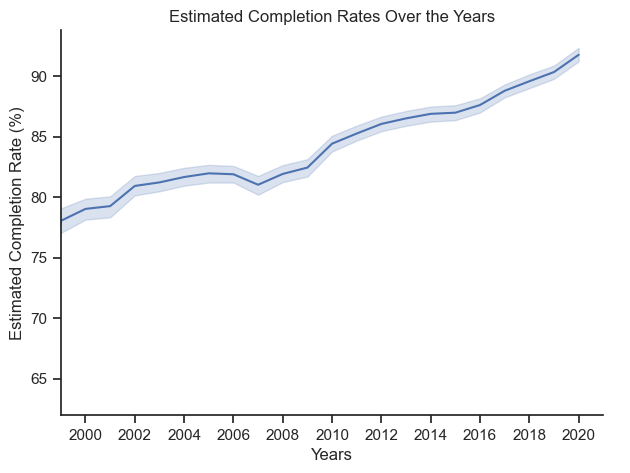

In [34]:
sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(7,5))
sns.despine(f)

plt.rc("axes.spines", top=True, right=False)
ax = sns.lineplot(x='YEAR', y ='ESTIMATED_COMPLETION_RATE', data=clean_data)
#THis is to remove the large jump that doesnt truly represent any data
plt.xlim("1999","2021")
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==0:
        xticks[i].set_visible(False)
        
        
plt.title("Estimated Completion Rates Over the Years")
plt.xlabel("Years")
plt.ylabel("Estimated Completion Rate (%)")
plt.show()

# Figure 1

In this graph, we can clearly see a consistent increase in Completion rates. I cannot say that this is because the importance of post-secondary school has increased, or other socialite norms have applied pressure onto students to finish school. All I can say is that definitively, Students tend to finish their dogwood diploma more often in current years versus past. This also does not say that post-Secondary enrollment have increased but more likely than not, people are finishing high school more often be it either that most jobs now require a minimum of a Highschool Diploma or less reason to drop out.

Text(0.5, 0, 'Year')

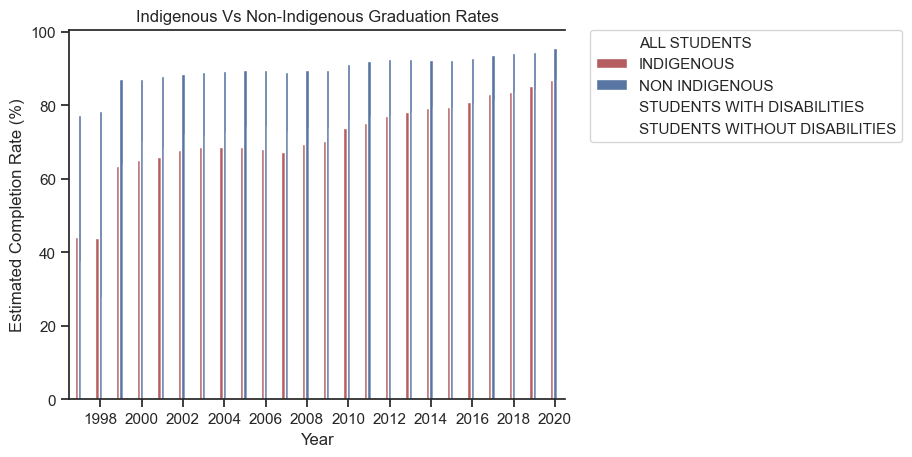

In [60]:
ax = sns.barplot(data=clean_data, x ='YEAR', y = 'ESTIMATED_COMPLETION_RATE', hue="Type of Student", palette=['w','r','b','w','w'],errorbar=None)
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==0:
        xticks[i].set_visible(False)


        
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.title("Indigenous Vs Non-Indigenous Graduation Rates")
plt.ylabel("Estimated Completion Rate (%)")
plt.xlabel("Year")

# Figure 2
This graph shows that while Indigenous graduation rate is consistently lower than non-Indigenous, the rates are in fact increasing alongside the non-Indigenous rates! This is exciting to see! This also shows an interesting piece of information, General Non-Indigenous students graduation rates have not increased all that much over the years comparatively.

Text(0.5, 0, 'Year')

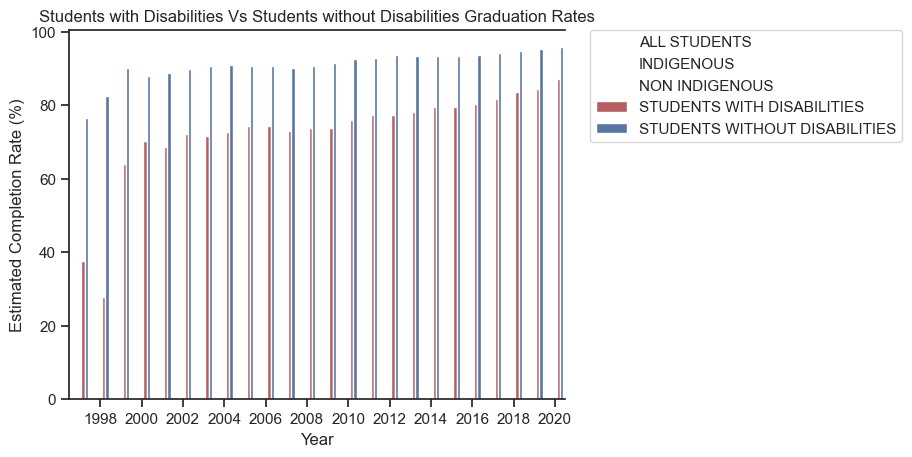

In [61]:
ax = sns.barplot(data=clean_data, x ='YEAR', y = 'ESTIMATED_COMPLETION_RATE', hue="Type of Student", palette=['w','w','w','r','b'],errorbar=None)
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==0:
        xticks[i].set_visible(False)


        
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.title("Students with Disabilities Vs Students without Disabilities Graduation Rates")
plt.ylabel("Estimated Completion Rate (%)")
plt.xlabel("Year")

# Figure 3
This chart compares Students with Disabilities vs Students without Disabilities graduation rates. Just like the Indigenous rates, students with disabilities follows a similar pattern of increase! This could be from better education or better support for those students, allowing them to succeed often.

# Conclusion:
Overall, the data shows that graduation rates have in fact increased over the years! Not only general students but even the diverse types! There has been a constant increase in both Indigenous and Students with Disabilities graduation rates over the years. This in turn creates an increased overall graduation rate! While general students’ rates have barely increased when compared to the other two subsections of students, they have also increased. Meaning that every subsection of students has increased they overall graduation rates every year, therefore the total completion rate has increased heavily since 1997! 